In [10]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree, linkage, fcluster)
from ISLP.cluster import compute_linkage

In [11]:
#Load data
spotify = pd.read_csv('data_w_genres.csv')
#drop records with the null genre
spotify = spotify.drop(spotify[spotify['genres']=="[]"].index)
#drop unessecary features
spotify.drop(columns=['mode', 'count', 'key', 'popularity'])
#prep input data
spotify_input = spotify.drop(columns=['genres', 'artists'])

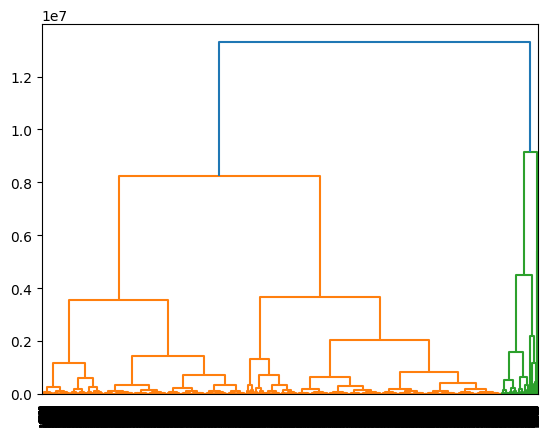

In [12]:
#hirearchical clustering w/ euclidan distance

#fit model using the Ward variance minimization algorithm
ward_clusters = linkage(spotify_input, method = 'ward', metric = 'euclidean')
#create a graphical representation
dendrogram(ward_clusters)
plt.show()

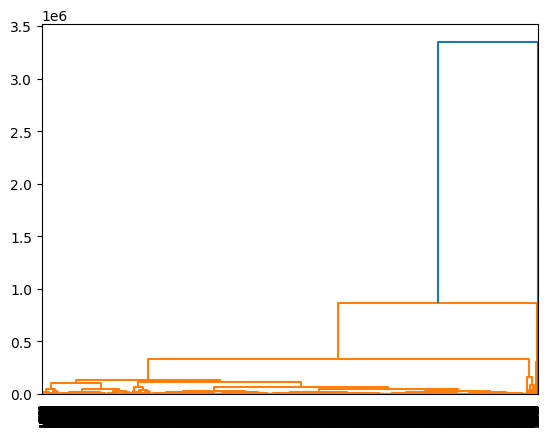

In [13]:
#fit model using the average clustering method
ave_clusters = linkage(spotify_input, method = 'average', metric = 'euclidean')
#create a graphical representation
dendrogram(ave_clusters)
plt.show()

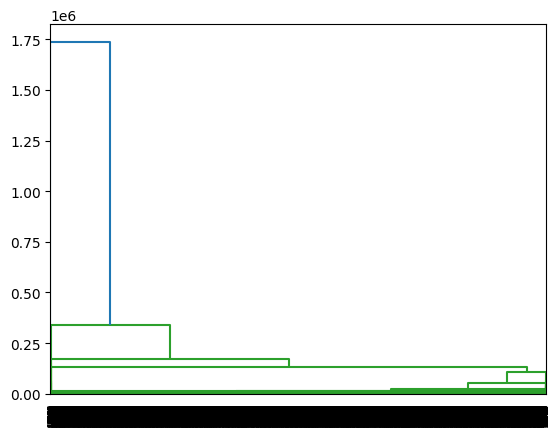

In [14]:
#fit model using the single clustering method
single_clusters = linkage(spotify_input, method = 'single', metric = 'euclidean')
#create a graphical representation
dendrogram(single_clusters)
plt.show()

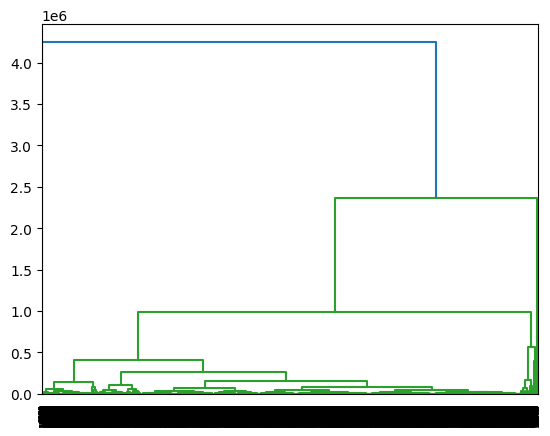

In [15]:
#fit model using the complete clustering method
complete_clusters = linkage(spotify_input, method = 'complete', metric = 'euclidean')
#create a graphical representation
dendrogram(complete_clusters)
plt.show()

In [ ]:
#compare to the number genres that spotify says exists

#set the number of genres
num_genres = 2972
#select the level with 2972 clusters in each model
ward_by_genres = fcluster(ward_clusters, num_genres, criterion='maxclust')
ave_by_genres = fcluster(ave_clusters, num_genres, criterion='maxclust')
single_by_genres = fcluster(single_clusters, num_genres, criterion='maxclust')
complete_by_genres = fcluster(complete_clusters, num_genres, criterion='maxclust')

#compare each clustering method to the real genres


array([ 819, 2151, 1492, ...,  134,  190,  642], dtype=int32)

In [ ]:
#select new genres from the winning model
#num_new_genres = 12
#new_genres = fcluster(model, num_new_genres, criteron='maxclust')

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)